# Central Limit Theorem

We want to get the intuition on the Central Limit Theorem (CLT) and then we will get to its interest and applications. Let's define a distribution that is clearly non-normal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
from scipy.stats import kurtosis, skew
import seaborn as sns

In [2]:
elements = np.arange(6)
probabilities = [0.3, 0., 0.05, 0.05, 0.2, 0.4]
X = np.random.choice(elements, 100, p=probabilities)

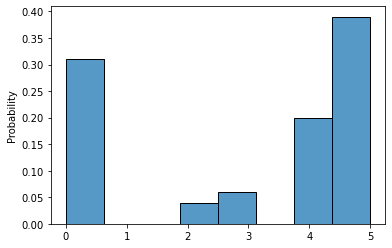

In [3]:
sns.histplot(X, stat='probability');

Now, we can draw samples from it. We are going to draw samples of size 4 and calculate its mean.

In [4]:
s_1 = np.random.choice(elements, 4, p=probabilities)
print(s_1)
x_bar_1 = np.mean(s_1)
print(x_bar_1)

[5 5 0 2]
3.0


Let's do the same procedure 10,000 times.

In [5]:
s = []
n=4
for i in range(10000):
    s.append(np.random.choice(elements, n, p=probabilities))
s = np.mean(np.asarray(s), axis=1)

Kurtosis: -0.33
Skew: -0.29
---
μ=3.06
σ=1.07


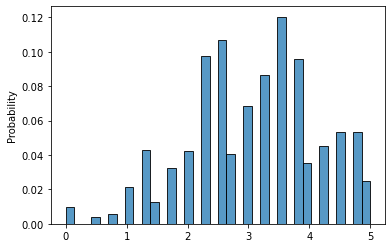

In [6]:
print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
print('---')
print('μ=' + str(np.round(np.mean(s), 2)))
print('σ=' + str(np.round(np.std(s), 2)))
sns.histplot(s, stat='probability');

The distribution above does not look like our original distribution anymore. What the CTL tells us is that as you take more samples and calculate their mean, the resulting distribution will approximate a normal distribution. We can measure it by the value of the skeweness and kurtosis, which for a normal distribution should be zero. A positively skewed distribution has a tail to the right, while a negative one has a tail to the left. If the distribution has positive kurtosis it means that it has fatter tails than the normal distribution; conversely, in a negative scenario the tails would be thinner.


What the CLT also tells us is that the approximation becomes better as the sample size increases. Let's test it by increasing the sample size from 4 to 20 and then to 100.

In [7]:
s = []
n=20
for i in range(10000):
    s.append(np.random.choice(elements, n, p=probabilities))
s = np.mean(np.asarray(s), axis=1)

Kurtosis: -0.09
Skew: -0.09
---
μ=3.05
σ=0.47


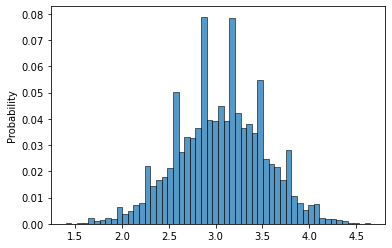

In [8]:
print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
print('---')
print('μ=' + str(np.round(np.mean(s), 2)))
print('σ=' + str(np.round(np.std(s), 2)))
sns.histplot(s, stat='probability');

In [9]:
s = []
n=100
for i in range(10000):
    s.append(np.random.choice(elements, n, p=probabilities))
s = np.mean(np.asarray(s), axis=1)

Kurtosis: -0.06
Skew: -0.11
---
μ=3.05
σ=0.21


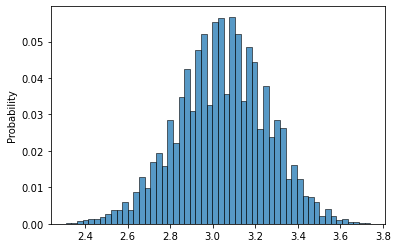

In [10]:
print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
print('---')
print('μ=' + str(np.round(np.mean(s), 2)))
print('σ=' + str(np.round(np.std(s), 2)))
sns.histplot(s, stat='probability');

Notice how the last plot resembles a normal distribution. Also notice that the value of mean and standard deviation of the sampling distribution that we have been plotting for the different sample sizes. Not surprisingly, the mean is the same as the original distribution. But the value for the standard deviation is indeed strange, as it has been shrinking. In fact, this is an important property to take note: the standard deviation of our sampling distribution of sample means is the square root of the standard deviation of the original population divided by the sample size. We can write it as:

$$\sigma_{\bar x} = \sqrt{\frac{\sigma^2}{n}}$$

In [11]:
print("Theoretical value: " + str(np.sqrt(X.var()/n)))
print("Empirically computed: " + str(s.std()))

Theoretical value: 0.21424051904343397
Empirically computed: 0.21212519389266332


This process is not specific to the sample mean, we could be, for instance, calculate the sample sum.

In [12]:
s = []
for i in range(10000):
    s.append(np.random.choice(elements, 100, p=probabilities))
s = np.sum(np.asarray(s), axis=1)

Kurtosis: 0.08
Skew: -0.05


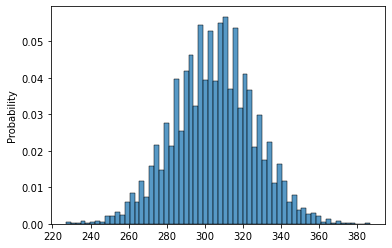

In [13]:
print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
sns.histplot(s, stat='probability');

I hope that now you see why the normal distribution is so often used to model different processes. Even if you do not know the distribution of a process that you want to describe statistically, if you add or take the mean of your measurements (assuming that they all have the same distribution), suddenly you get a normal distribution.